In [4]:
!pip install FinMind
from five_lines_classify_plot.from_FinMind import load_from_FinMind
from five_lines_classify_plot.trim_and_adj import trim_then_adjust
import pandas as pd
import numpy as np
from datetime import datetime
from five_lines_classify_plot.classify_and_plot import five_line_classify_and_plot

  Using cached FinMind-1.5.5-py3-none-any.whl (48 kB)
  Using cached aiohttp-3.8.1-cp38-cp38-win_amd64.whl (555 kB)
Processing c:\users\user\appdata\local\pip\cache\wheels\58\89\b5\823b076c3794cc16e7cd6a76e5358ed03140e10ff93e46d8e2\ta-0.5.25-py3-none-any.whl
  Using cached pyecharts-1.9.1-py3-none-any.whl (135 kB)
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using cached frozenlist-1.3.0-cp38-cp38-win_amd64.whl (33 kB)
  Using cached yarl-1.7.2-cp38-cp38-win_amd64.whl (122 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached win32_setctime-1.1.0-py3-none-any.whl (3.6 kB)
  Using cached simplejson-3.17.6-cp38-cp38-win_amd64.whl (75 kB)
  Attempting uninstall: pytest
    Found existing installation: pytest 5.4.3
    Uninstalling pytest-5.4.3:
      Successfully uninstalled pytest-5.4.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18

ERROR: flask 2.1.2 has requirement Jinja2>=3.0, but you'll have jinja2 2.11.2 which is incompatible.
d:\Anaconda3\lib\site-packages\FinMind\strategies\base.py:423: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def final_stats(self) -> pd.Series():
d:\Anaconda3\lib\site-packages\FinMind\strategies\base.py:450: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def compare_market_stats(self) -> pd.Series():


ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
buy_list = ['0050', '2330', '1215']
data = load_from_FinMind(buy_list)
for sid in data:
    data[sid] = trim_then_adjust(data[sid], sid)
    data[sid].index = [datetime.strptime(d, "%Y-%m-%d").date() for d in data[sid].index]

In [3]:
high_df = pd.DataFrame({date: dicti['High'] for date, dicti in data.items()})
close_df = pd.DataFrame({date: dicti['Close'] for date, dicti in data.items()})
low_df = pd.DataFrame({date: dicti['Low'] for date, dicti in data.items()})

2019-01-22  to  2019-11-22 


--------------
\ group >  0° \
 --------------

3


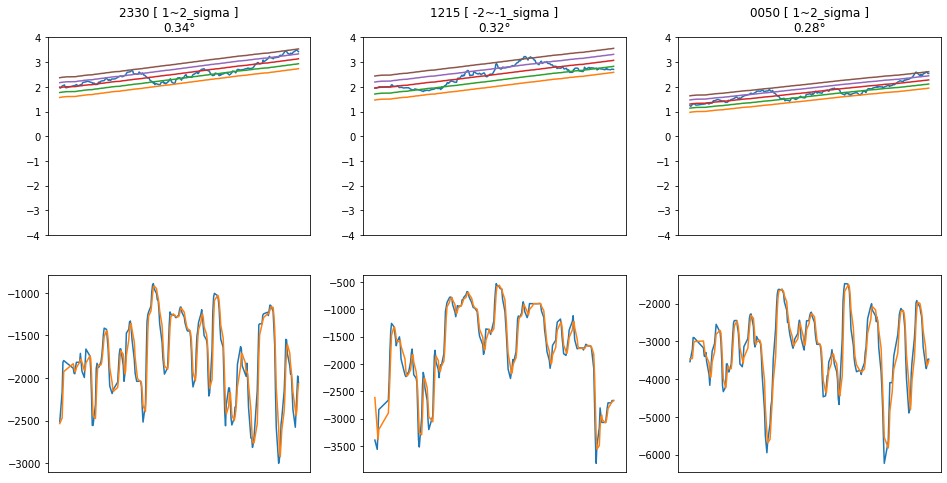

In [4]:
group1 = five_line_classify_and_plot((close_df - close_df.mean())/close_df.std(), days=200, mode='stock', high=high_df, low=low_df)

In [5]:
group1.describe()

beta                                                            \
        count      mean       std       min      25%      50%       75%   
section                                                                   
4         3.0  0.314465  0.026821  0.284399  0.30373  0.32306  0.329497   

                   
              max  
section            
4        0.335935

## 基金

In [6]:
import pickle
def load_obj(name):
    with open(str(name) + '.pkl', 'rb') as f:
        return pickle.load(f)
fund_price = load_obj('five_lines_classify_plot/fund_nav')

## 只選擇富邦可售plot

In [5]:
fund_id = load_obj('fund_id')

#若要從fund_id挑, 要加"if fid in fund_price.columns" 因為fund_id 5115個, fund_price(爬蟲抓到的)5017個
fund_price = fund_price[[fid for fid in fund_id[fund_id['富邦可售']]['基金代碼'] if fid in fund_price.columns]]

#先只印 10個
fund_price = fund_price[fund_price.columns[:10]]

NameError: name 'load_obj' is not defined


 Remember to click the red button at bottom when finish using !! 

2016-11-08  to  2019-09-17 


--------------
\ group >  0° \
 --------------

6


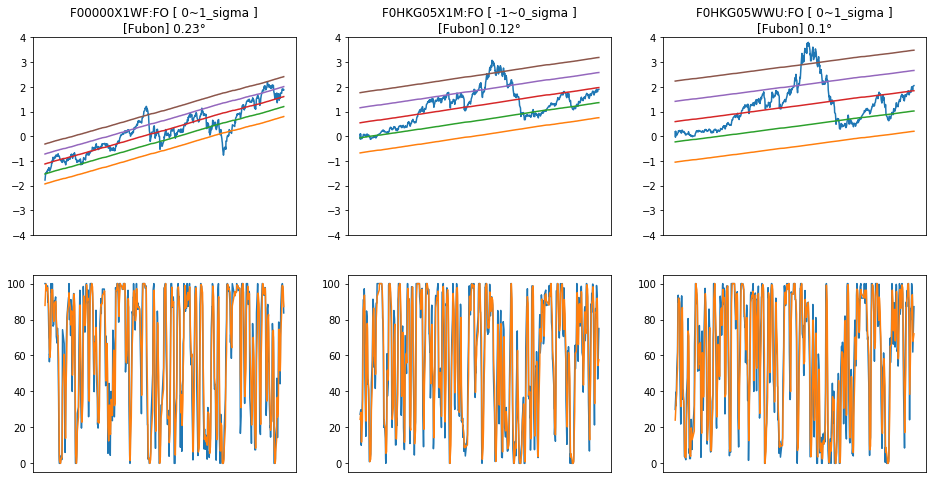

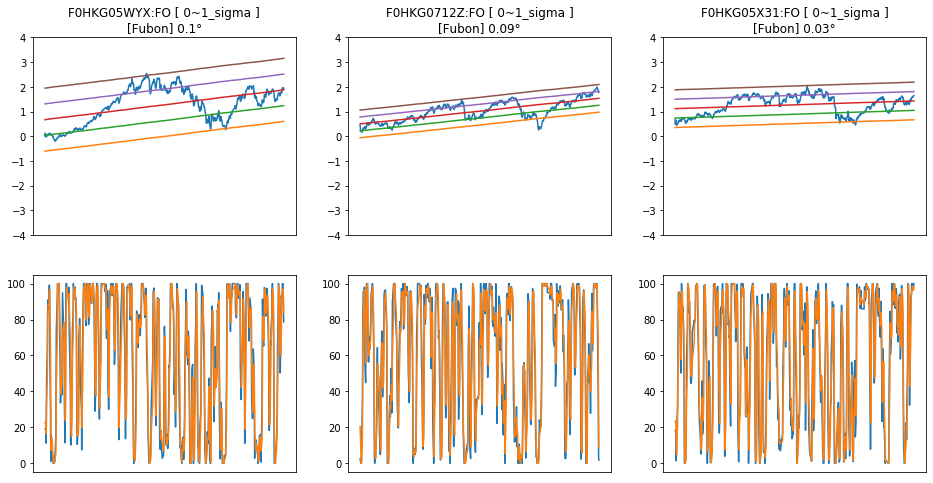

Button(description='exit driver', style=ButtonStyle(button_color='#DC143C'))

In [8]:
group2 = five_line_classify_and_plot((fund_price-fund_price.mean())/fund_price.std(), days=750)

In [9]:
group2.describe()

beta                                                              \
        count      mean       std       min       25%       50%       75%   
section                                                                     
4         6.0  0.112514  0.068081  0.025742  0.092614  0.103697  0.114761   

                  
             max  
section           
4        0.23458

In [10]:
group2.get_group(4)

,beta,section
F00000X1WF:FO,0.234580,4
F0HKG05X1M:FO,0.118418,4
F0HKG05WWU:FO,0.103791,4
F0HKG05WYX:FO,0.103603,4
F0HKG0712Z:FO,0.088951,4
F0HKG05X31:FO,0.025742,4
